# Experiment 2: Results

In [1]:
import numpy as np
from visualization.utils import make_defaults, get_track_and_states_df,  wandb2df, plot_states
from visualization.utils import defaults as d
from helpers.paths import Path
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
make_defaults()

In [2]:
# Load data
df_summary_sac = pd.read_csv(Path().data / 'exp2_noise_1dt2cxqq_summary.csv')
df_summary_dsac = pd.read_csv(Path().data / 'exp2_noise_73376dn5_summary.csv')

In [3]:
df_sac_results = df_summary_sac.copy()
df_sac_results[['online/nmae', 'eval/nmae']] *= 100
df_sac_results[[ 'eval/nmae', 'online/nmae', 'hybrid_improvement']].agg(['mean', 'std'])

,eval/nmae,online/nmae,hybrid_improvement
mean,16.635572,4.044528,12.591044
std,2.215355,0.894926,2.669289


In [4]:
df_dsac_results = df_summary_dsac.copy()
df_dsac_results[['online/nmae', 'eval/nmae']] *= 100
df_dsac_results[[ 'eval/nmae', 'online/nmae', 'hybrid_improvement']].agg(['mean', 'std'])

,eval/nmae,online/nmae,hybrid_improvement
mean,18.737428,2.869480,15.867947
std,9.813910,0.495613,9.520858


## Tracking overview

In [5]:
df_sac_eval = wandb2df(pd.read_csv(Path().data / 'exp2_sac_eval.csv'), "eval/step")
df_sac_eval_states = wandb2df(pd.read_csv(Path().data / 'exp2_sac_eval_states.csv'), "citation_states/step")
df_sac_online = wandb2df(pd.read_csv(Path().data / 'exp2_sac_online.csv'), "online/step")
df_sac_online_states = wandb2df(pd.read_csv(Path().data / 'exp2_sac_online_states.csv'), "online_states/step")

df_dsac_eval = wandb2df(pd.read_csv(Path().data / 'exp2_dsac_eval.csv'), "eval/step")
df_dsac_eval_states = wandb2df(pd.read_csv(Path().data / 'exp2_dsac_eval_states.csv'), "citation_states/step")
df_dsac_online = wandb2df(pd.read_csv(Path().data / 'exp2_dsac_online.csv'), "online/step")
df_dsac_online.rename(columns={"action_da": "da", "action_dr": "dr", "action_de": "de"}, inplace=True)
df_dsac_online_states = wandb2df(pd.read_csv(Path().data / 'exp2_dsac_online_states.csv'), "online_states/step")

### DSAC

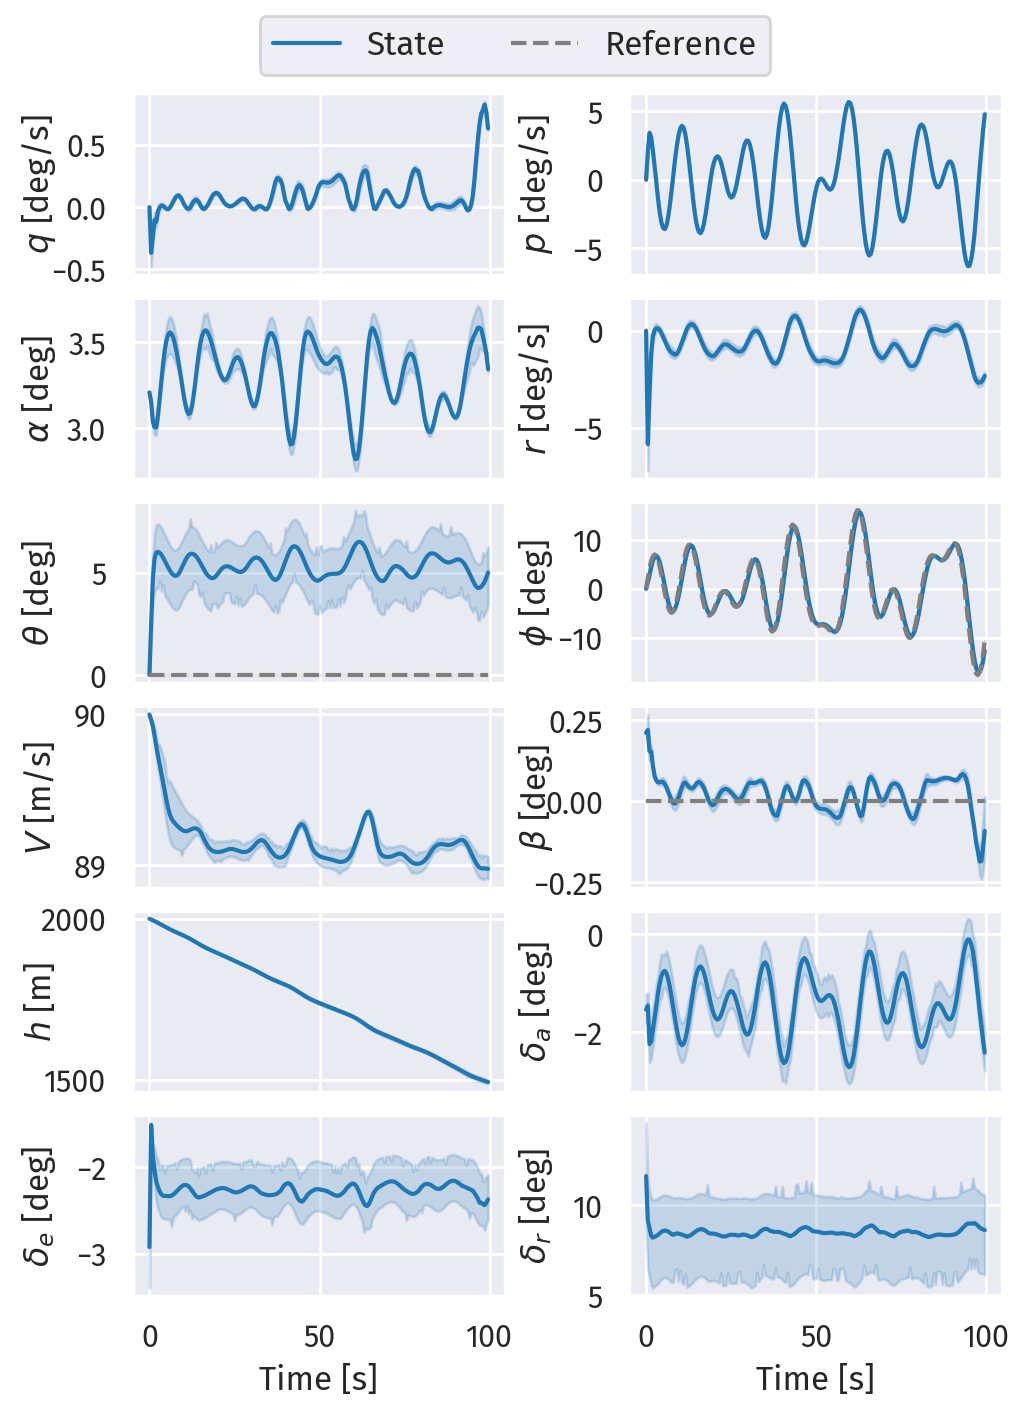

In [6]:
df_track, df_states = get_track_and_states_df(df_summary_dsac, df_dsac_eval, df_dsac_eval_states)
_, _ = plot_states(df_track, df_states)
if False:
    plt.savefig(Path().paper_figures / 'exp2_dsac_only.pdf', bbox_inches='tight')

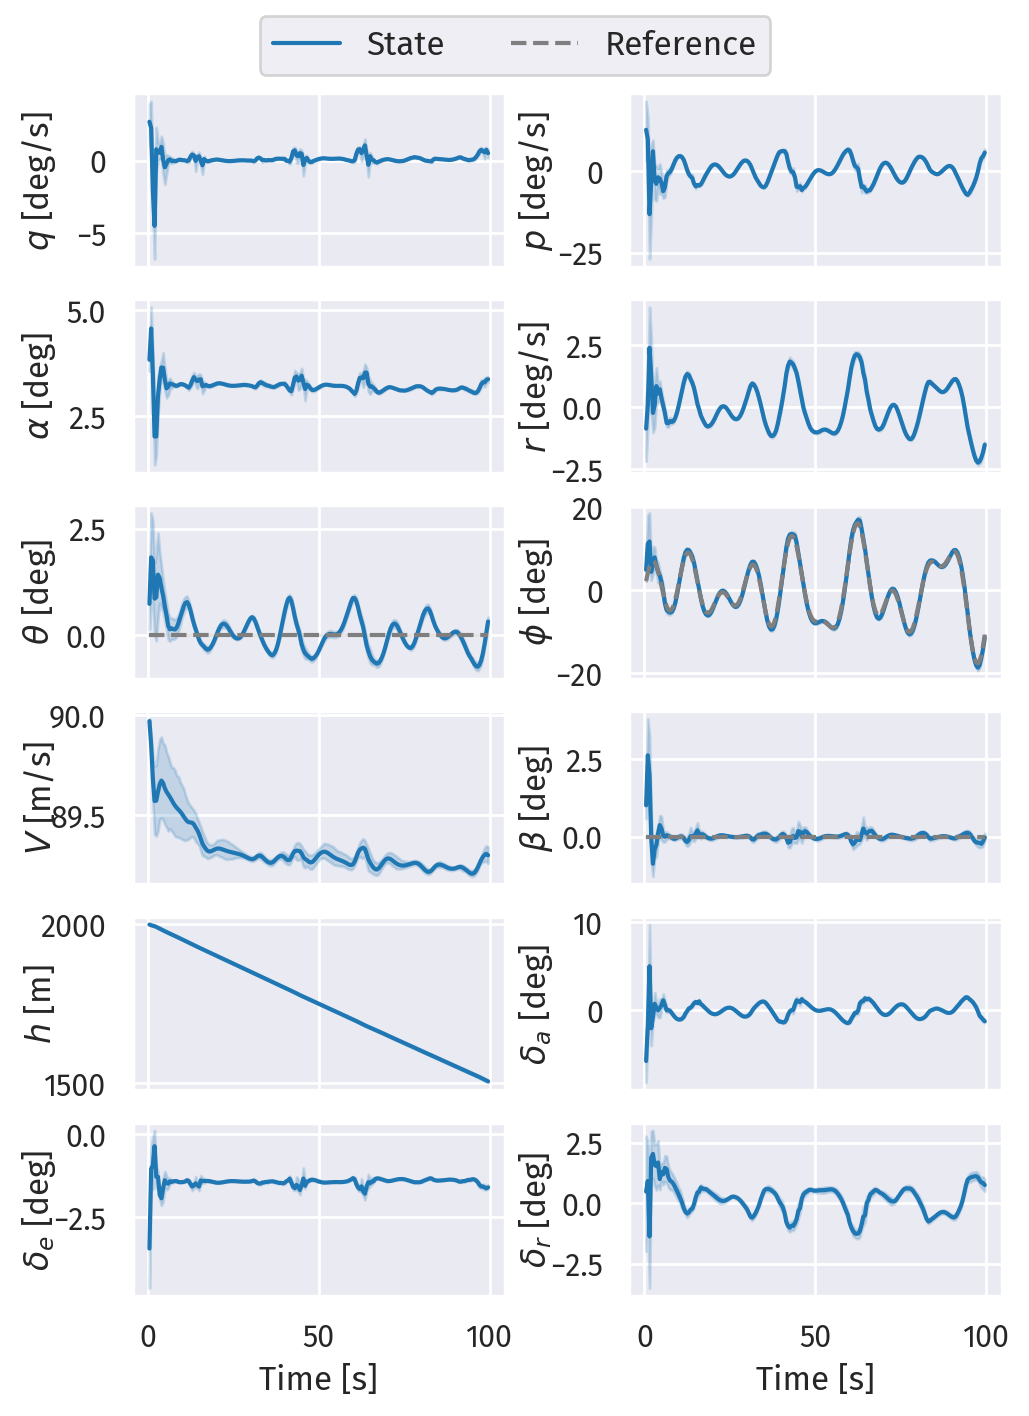

In [7]:
df_track, df_states = get_track_and_states_df(df_summary_dsac, df_dsac_online, df_dsac_online_states)
_, _ = plot_states(df_track, df_states)
if False:
    plt.savefig(Path().paper_figures / 'exp2_dsac_hybrid.pdf', bbox_inches='tight')